# Chi-squared Distribution

### task 1

Chi-square is most commonly used by researchers who are studying survey response data because it applies to categorical variables. Demography, consumer and marketing research, political science, and economics are all examples of this type of research.

The `chi-squared` distribution with $n$ `degree of freedom` is the distribution of $\chi^{2}_{n} = Z^{2}_{1} + ...+ Z^{2}_{n} $ where $Z_{i}, i = 1, 2, ..., n$ are independent standart normals, each having the mean zero $\mu = 0$ and variance unity $\sigma ^{2} = 1$.
The number of independent squared normal variables determines a parameter of distribution calles the number of `degree of freedom` and ensures that the chi-square tests are statistically valid.

In [10]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

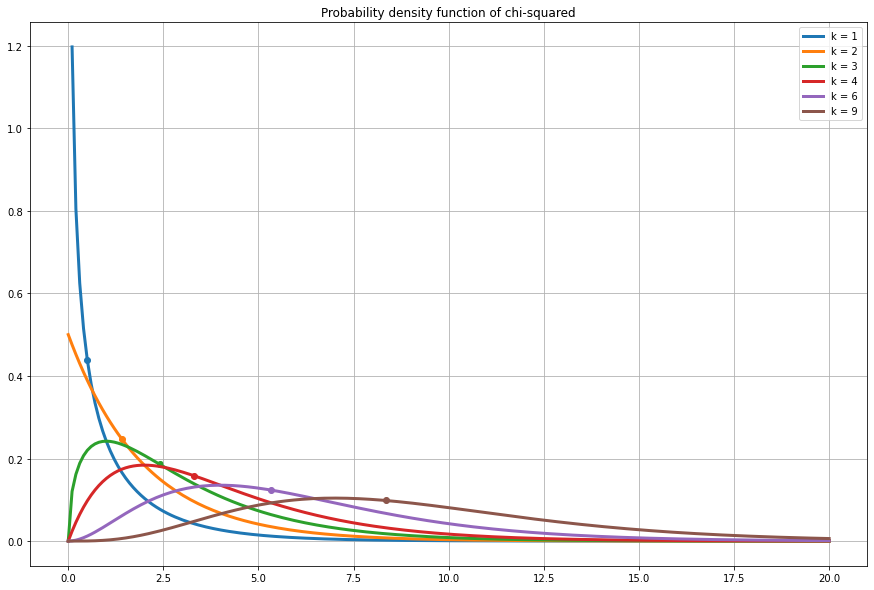

In [4]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, ax = plt.subplots()
x = np.linspace(0, 20, 200)

df = [1, 2, 3, 4, 6, 9] # parametry pro chi2 distribuci

for k in df:
    ax.plot(x, stats.chi2.pdf(x, k), lw=3, label='k = ' + str(k))
    index = np.argmin(np.abs(stats.chi2.cdf(x, k) - 0.5))
    half_prob = x[index]
    plt.scatter(half_prob, stats.chi2.pdf(half_prob, k))
    
ax.grid()
ax.legend(loc='upper right')
ax.set(title='Probability density function of chi-squared')
plt.show()

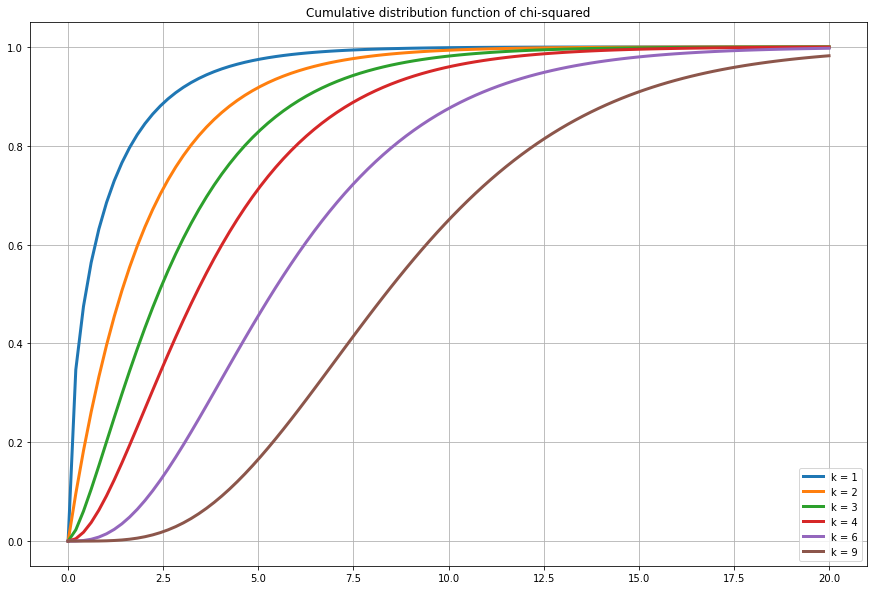

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, ax = plt.subplots()
x = np.linspace(0, 20, 100)

df = [1, 2, 3, 4, 6, 9] # parametry pro chi2 distribuci
for k in df:
    ax.plot(x, stats.chi2.cdf(x, k), lw=3, label='k = ' + str(k))
ax.grid()
ax.legend(loc='lower right')
ax.set(title='Cumulative distribution function of chi-squared')
plt.show()

### task 2

In [6]:
def roll_die(number_of_simulations):
    count = 0
    
    for i in range(number_of_simulations):
        die = np.random.randint(1, 7) # choose random integers from 1 to 6
        
        if die == 6:
            count += 1
        
    return count / number_of_simulations

In [7]:
number_of_simulations = 1000000
prob_estimate = roll_die(number_of_simulations)
prob_estimate

0.167063

In [11]:
def confidance_interval(prob_estimate, number_of_simulations, alpha=0.95):
    low = prob_estimate - stats.norm.ppf(alpha) * math.sqrt(prob_estimate * (1 - prob_estimate))/math.sqrt(number_of_simulations)
    high = prob_estimate + stats.norm.ppf(alpha) * math.sqrt(prob_estimate * (1 - prob_estimate))/math.sqrt(number_of_simulations)
    
    return (low, high)

confidance_interval(prob_estimate, number_of_simulations)

(0.16644941678323424, 0.16767658321676573)